In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [202]:
experiment = "01_Multiplication" # 506
# experiment = "02_Compare" # 507|508|509
experiment = "05_Reveal" # 512
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

data=[]
framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]

base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [203]:
import pandas as pd


In [204]:
# fl_paths[-1].split("/")[-2]

In [205]:
# runtime/3600

mean bandwidths(Mbs)
100      0.192991
1000     0.028997
10000    0.010985
25000    0.012986
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.188990
1000     0.030000
10000    0.017990
25000    0.021994
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.861000
1000     0.695000
10000    0.583000
25000    0.590333
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      5.242000
1000     0.835000
10000    0.378000
25000    0.367333
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.566000
1000     0.394000
10000    0.282000
25000    0.280667
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.6020
1000     0.4410
10000    0.3240
25000    0.3215
Name: runtime_external(s), dtype: float64
['HPMPC', 'MP-Slice', 'MP-SPDZ replicated-field honest maj.', 'MP-SPDZ semi2k dishonet maj.', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ ps-rep-ring honest maj.'

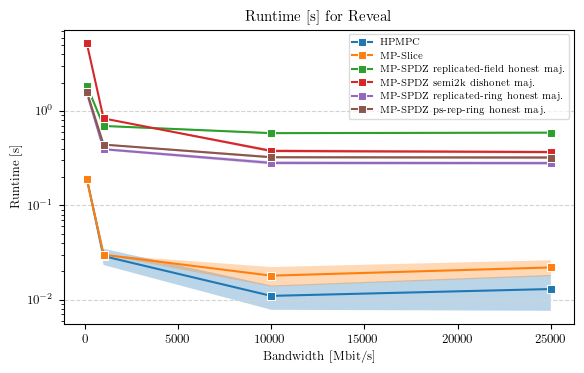

In [206]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del bandwidth[0]
# del bandwidth[-1]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

label = ['HPMPC', 'MP-Slice', 'MP-SPDZ replicated-field honest maj.', 'MP-SPDZ semi2k dishonet maj.', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ ps-rep-ring honest maj.']

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

mean latencies(ms)
0     0.012986
25    0.288989
50    0.559992
75    0.834996
Name: runtime_external(s), dtype: float64
mean latencies(ms)
0    0.021994
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.590333
25    3.161000
50    5.566000
75    8.038000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0      0.367333
25     4.108000
50     7.812000
75    11.543000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.280667
25    2.839000
50    5.262000
75    7.673000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.3215
25    3.1110
50    5.7700
75    8.4090
Name: runtime_external(s), dtype: float64


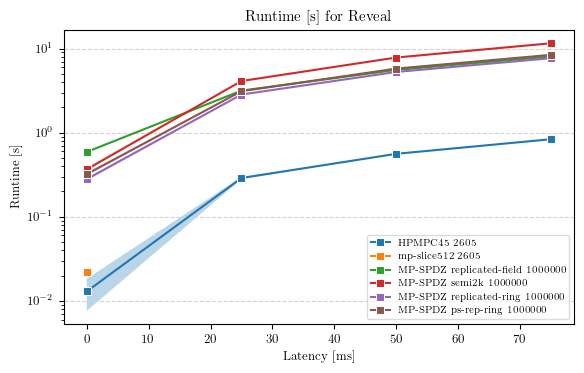

In [207]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del latency[0]
# del latency[-1]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_13472/1048530013.py:28: SyntaxWarning: invalid escape sequence '\%'
  rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)


mean packetdrops(%)
0    0.012986
1    1.338994
2    1.645992
5    3.736990
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.021994
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.590333
1    1.402000
2    1.959000
5    3.055000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.367333
1    0.706000
2    1.180000
5    4.444000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.280667
1    1.063000
2    1.399000
5    2.860000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.3215
Name: runtime_external(s), dtype: float64
[                    mean       std  packetdrops(%)
packetdrops(%)                                    
0               0.012986  0.005354               0
1               1.338994  0.493029               1
2               1.645992  0.804127               2
5               3.736990  1.919341               5,                     mean      std  packetdrops(%)
packetdrops(%)      

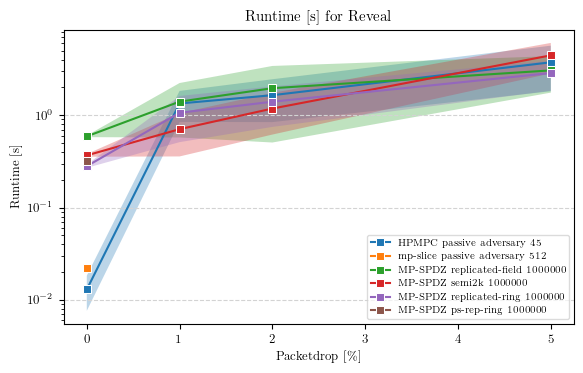

In [208]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del packetdrop[0]
# del packetdrop[-1]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)

In [209]:
[df['mean'].iloc[0] for df in bandwidth]

[0.19299119999999997, 0.1889904, 1.861, 5.242, 1.566, 1.6019999999999999]

In [210]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.009487116653651952,
 0.008754735952614452,
 0.01370320319406299,
 0.02936362072739375,
 0.008432740427115719,
 0.007888106377466161]

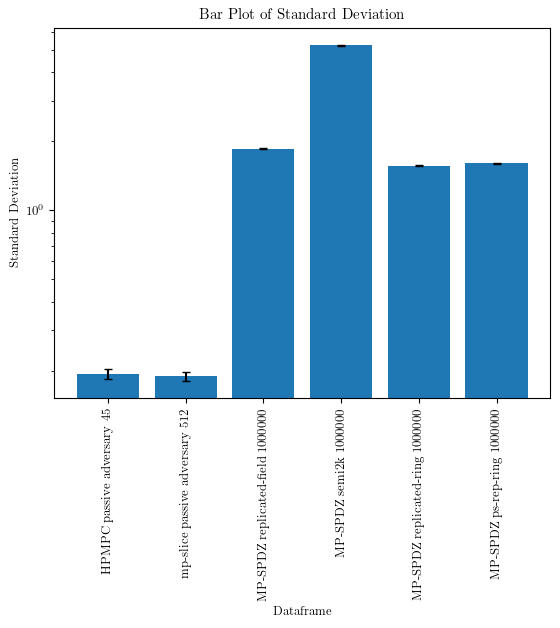

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


In [212]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example data
# fig, ax = plt.subplots()
# deviation61 = data[0].loc[(data[0]['function'] == 507) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation62 = data[0].loc[(data[0]['function'] == 508)  & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation63 = data[0].loc[(data[0]['function'] == 509) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# 
# # Plot the first violin plot
# two_dimensional_list = [deviation61, deviation62, deviation63]
# ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# # Set the x-tick labels
# ax.set_xticks([1, 2, 3])
# ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])
# 
# 
# # Set plot title and labels
# plt.title("Devation of runtime for HP-MPC Logistic Regression")
# plt.xlabel("Comparison Type")
# plt.ylabel("Runtime [s]")
# ax.figure.set_size_inches(5.91, 2.8)
# fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
# plt.show()